In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from windrose import WindroseAxes
import matplotlib.cm as cm 
from scipy.stats import f_oneway, kruskal

# Load each data

In [11]:
benin = pd.read_csv('../data/benin_clean.csv')
sierra_leone = pd.read_csv('../data/sierra_leone_clean.csv')
togo = pd.read_csv('../data/togo_clean.csv')


# Metric Comparison

    Box Plot

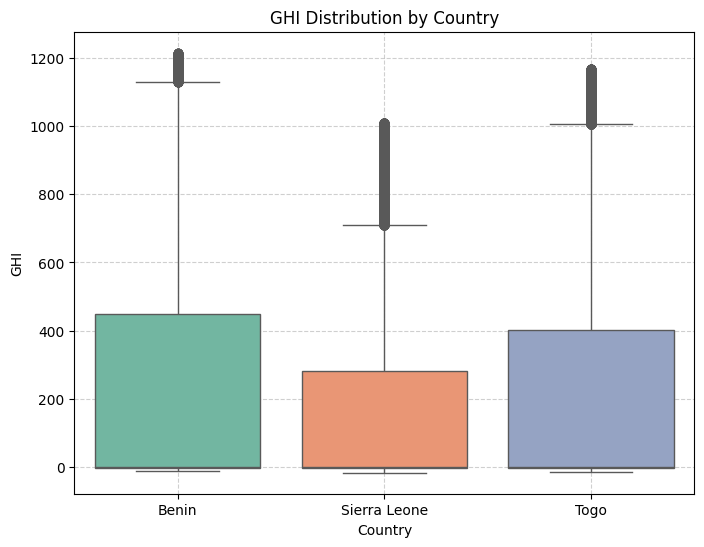

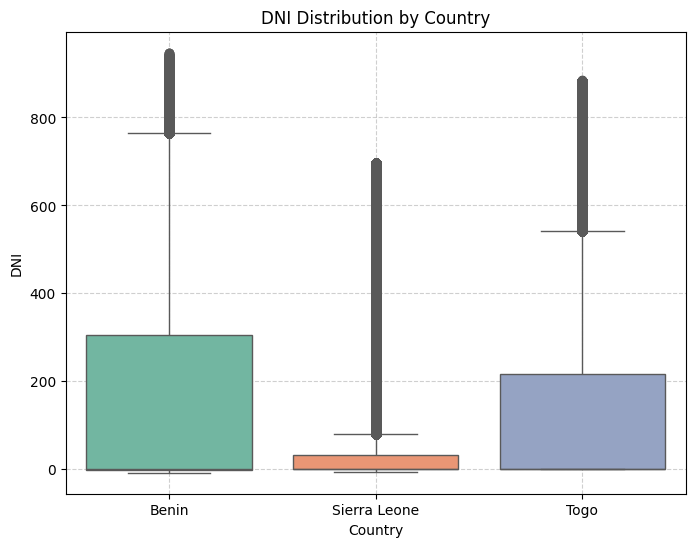

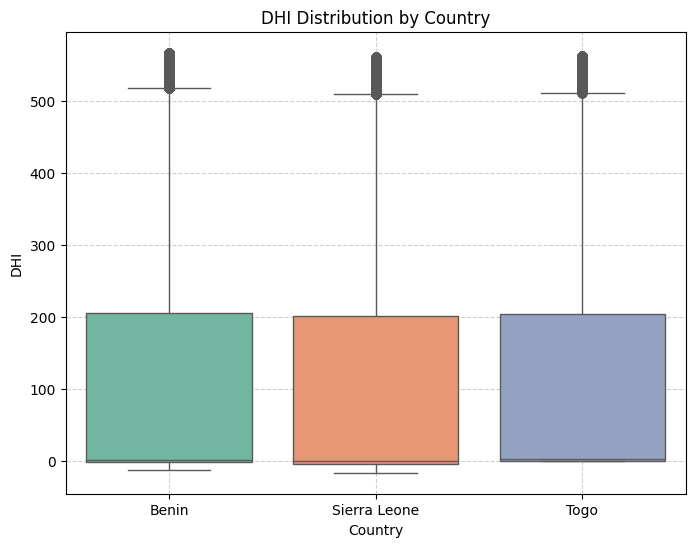

In [12]:
#combine data
combined = pd.concat([
    benin.assign(Country='Benin'),
    sierra_leone.assign(Country='Sierra Leone'),
    togo.assign(Country='Togo')
])

metrics = ["GHI", "DNI", "DHI"]

for metric in metrics:
    plt.figure(figsize=(8,6))
    sns.boxplot(x="Country", y=metric, data= combined, palette="Set2", hue="Country", legend=False)
    plt.title(f"{metric} Distribution by Country")
    plt.xlabel("Country")
    plt.ylabel(metric)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

# Summary Table

In [21]:
# calculate stats
stats = combined.groupby('Country')[metrics].agg(['mean', 'median', 'std']).round(2)
print(stats)

                 GHI                    DNI                    DHI         \
                mean median     std    mean median     std    mean median   
Country                                                                     
Benin         229.79    1.8  325.34  163.64   -0.1  260.81  107.87    1.6   
Sierra Leone  162.97   -0.4  258.74   87.91   -0.1  179.88   99.62   -0.6   
Togo          215.79    2.0  312.86  143.04    0.0  244.05  108.76    2.5   

                      
                 std  
Country               
Benin         149.81  
Sierra Leone  149.19  
Togo          148.67  


# Statistical Testing

In [19]:
# Define a function to run tests
def test_significance(metric):
    # Extract data per country
    benin = combined.loc[combined['Country']=='Benin'][metric]
    sierra = combined.loc[combined['Country']=='Sierra Leone'][metric]
    togo = combined.loc[combined['Country']=='Togo'][metric]
    
    # ANOVA (assumes normality)
    anova_result = f_oneway(benin, sierra, togo)
    # Kruskal-Wallis (non-parametric)
    kruskal_result = kruskal(benin, sierra, togo)
    
    print(f"--- {metric} ---")
    print(f"ANOVA p-value: {anova_result.pvalue:.4f}")
    print(f"Kruskal-Wallis p-value: {kruskal_result.pvalue:.4f}\n")

# Run tests for GHI, DNI, DHI
test_significance('GHI')
test_significance('DNI')
test_significance('DHI')

--- GHI ---
ANOVA p-value: 0.0000
Kruskal-Wallis p-value: 0.0000

--- DNI ---
ANOVA p-value: 0.0000
Kruskal-Wallis p-value: 0.0000

--- DHI ---
ANOVA p-value: 0.0000
Kruskal-Wallis p-value: 0.0000



# Visual Summary

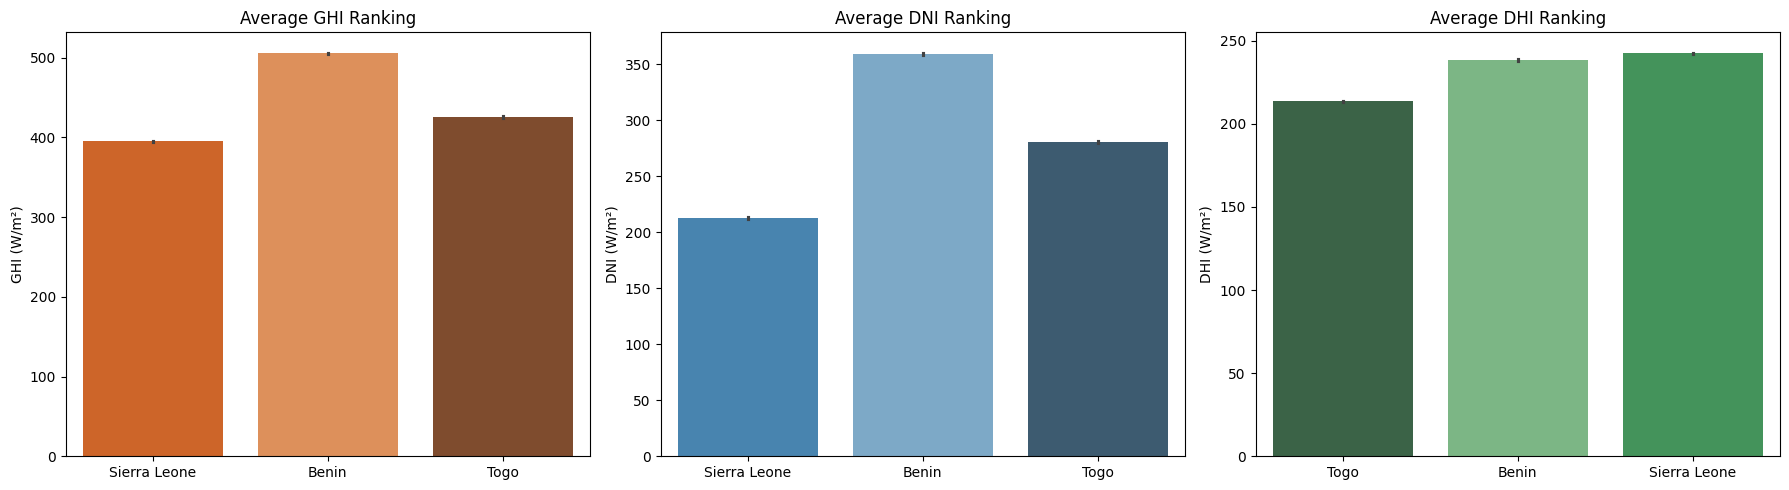

In [23]:
# Create a 1x3 grid for GHI, DNI, DHI
cleaned = combined[(combined[['GHI', 'DNI', 'DHI']] >= 0).all(axis=1)]
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# GHI Ranking
sns.barplot(x='Country', y='GHI', hue='Country', data=cleaned, 
            estimator='mean', order=['Sierra Leone', 'Benin', 'Togo'],
            palette='Oranges_d', ax=axes[0], legend=False)
axes[0].set_title('Average GHI Ranking')
axes[0].set_ylabel('GHI (W/m²)')
axes[0].set_xlabel('')

# DNI Ranking
sns.barplot(x='Country', y='DNI', hue='Country', data=cleaned,
            estimator='mean', order=['Sierra Leone', 'Benin', 'Togo'],
            palette='Blues_d', ax=axes[1], legend=False)
axes[1].set_title('Average DNI Ranking')
axes[1].set_ylabel('DNI (W/m²)')
axes[1].set_xlabel('')

# DHI Ranking
sns.barplot(x='Country', y='DHI', hue='Country', data=cleaned,
            estimator='mean', order=['Togo', 'Benin', 'Sierra Leone'],
            palette='Greens_d', ax=axes[2], legend=False)
axes[2].set_title('Average DHI Ranking')
axes[2].set_ylabel('DHI (W/m²)')
axes[2].set_xlabel('')

plt.tight_layout()
plt.show()

# Key Observations

- Benin records the highest mean GHI (229.79 W/m²) and also the largest variability (std = 325.34 W/m²). This suggests strong but inconsistent solar irradiance, meaning Benin experiences both very sunny and cloudy conditions throughout the year.

- Togo follows with a moderately high mean GHI (215.79 W/m²) but slightly lower variability, indicating more stable solar conditions compared to Benin. Its DNI (143.04 W/m²) also supports relatively strong direct sunlight potential.

- Siera Leone consistently shows the lowest averages across all three metrics (GHI = 162.97, DNI = 87.91, DHI = 99.62 W/m²), suggesting weaker solar irradiance overall. However, its similar DHI values indicate a higher share of diffuse light, possibly due to persistent cloud cover or humidity.